No matter how many dimensions you have. Kalman Filter is not about positions but about general solution of how to predict a system state.

In general you need to have state transition matrix that is in case of movement normally adds velocity columns - one for each dimension - since when moving an object adds certain amount of position each iteration.

You also need the covariance matrix that defines the covariance of state vector elements.

And also different matrices that adds certain amount of external input (like noise, control, etc.).

However in the simplest cases you do not need to set up all of them. Below is the simple example of 3D case with the help of Kalman Filter implementation of filterpy package.

Where

f.x is your initial state vector of [x, y, z, vx, vy, vz] where v means velocity.
f.F is your state transition matrix, i.e. the model describing the way you expect the position of your object would change. For example according to the model from example, your x would change as 1*x + 0*y + 0*z + 1*vx + 0*vy + 0*vz = x + vx each step.
f.H - The matrix that defines measurement function
The above example uses default covariance matrix, default noises, etc.

P.S. - Regarding from where take the measurements we cannot advice you anything. That depends on what data or what sensors you have.

In [1]:
import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

In [2]:

f = KalmanFilter(6, 3)

f.x = np.array([0., 0., 0., 0., 0., 0.])
f.F = np.asarray(
    [
        [1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]
    ]
)

f.H = np.array([
    [1., 0., 0., 0., 0., 0.],
    [0., 1., 0., 0., 0., 0.],
    [0., 0., 1., 0., 0., 0.]
])



Measured:  [0. 0. 0.]
predicted:  [10.00572868  1.00057287  0.10005729  1.00401331  0.10040133  0.01004013]
Measured:  [1.   0.1  0.01]
predicted:  [-1.43667262 -0.14366726 -0.01436673 -3.21922907 -0.32192291 -0.03219229]
Measured:  [2.   0.2  0.02]
predicted:  [-1.62485431 -0.16248543 -0.01624854 -2.19075234 -0.21907523 -0.02190752]
Measured:  [3.   0.3  0.03]
predicted:  [ 0.69345421  0.06934542  0.00693454 -0.66076499 -0.0660765  -0.00660765]
Measured:  [4.   0.4  0.04]
predicted:  [2.90186808 0.29018681 0.02901868 0.31278748 0.03127875 0.00312787]
Measured:  [5.   0.5  0.05]
predicted:  [4.58065354 0.45806535 0.04580654 0.77628968 0.07762897 0.0077629 ]
Measured:  [6.   0.6  0.06]
predicted:  [5.87858038 0.58785804 0.0587858  0.95328846 0.09532885 0.00953288]
Measured:  [7.   0.7  0.07]
predicted:  [6.98290621 0.69829062 0.06982906 1.00453755 0.10045375 0.01004538]
Measured:  [8.   0.8  0.08]
predicted:  [8.00870722 0.80087072 0.08008707 1.01175254 0.10117525 0.01011753]
Measured: 

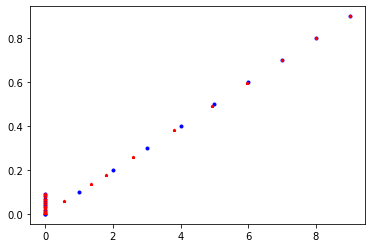

In [17]:

for i in range(10):
    z = np.array([i, 0.1*i, 0.01*i])
    print('Measured: ', z)
    plt.plot(z[0],z[1],z[2], c='blue', marker='o', markersize=3)
    f.predict()
    print('predicted: ', f.x)
    f.update(z)
    plt.plot(f.x[0],f.x[1],f.x[2], c='red', marker='*', markersize=3)